In [1]:
#coding: UTF-8

# 包含库 ######################################################
# 绘制图片需要
from matplotlib import pyplot as plt
import numpy as np
import cv2

import os
import sys
sys.path.append('/usr/local/lib64')
sys.path.append('/home/wilson/faceEmotionCppLinux/lib')

# 引入功能库
import register as feRegister
import recognize as feRecognizer

In [2]:
# 注册人脸 ####################################################
def registerImage(pPath):
    try:
        # 获取处理实例
        instance = feRegister.createInstance()
        response = feRegister.register(instance, pPath)
        if response.count < 1:
            print("no any images registered")
        else:
            for k in range(response.count):
                e = response.elems[k]
                faceName = bytes.decode(e.name)
                imagePath = bytes.decode(e.imagePath)
                print("faceName :", faceName)
                print("imagePath:", imagePath)
                print("rect:", e.left, e.top, e.right, e.bottom)
                ptLeftTop = (e.left, e.top)
                ptRightBottom = (e.right, e.bottom)

                img = cv2.imread(imagePath)

                # 绘制一个红色矩形概括人脸
                point_color = (255, 0, 0) # BGR
                thickness = 1
                lineType = 8
                cv2.rectangle(img, ptLeftTop, ptRightBottom, point_color, thickness, lineType)
                
                # 显示文本表明人脸信息
                #img2 = img[:,:,::-1] # 必须为 ::-1
                cv2.putText(img, faceName, ptLeftTop, cv2.FONT_HERSHEY_SIMPLEX, 1, (180,100,255),2, cv2.LINE_AA)

                plt.imshow(img)
                plt.show()
    finally:
        feRegister.releaseRegisterResponse(instance, response)
        feRegister.releaseInstance(instance)
        instance = None

In [3]:
# 识别人脸 ####################################################
def recognizeImage(pPath):
    try:
        # 获取处理实例
        instance = feRecognizer.createInstance()
        response = feRecognizer.recognize(instance, pPath)
        if response.count < 1:
            print("no any images recognized")
        else:
            for k in range(response.count):
                e = response.elems[k]
                faceName = bytes.decode(e.name)
                personName = bytes.decode(e.personName) # 数据库存储的值，无需解码
                imagePath = bytes.decode(e.imagePath)
                print("faceName       :", faceName)
                print("imagePath      :", imagePath)
                print("rect           :", e.left, e.top, e.right, e.bottom)
                print("personName     :", personName)
                print("confidenceLevel:", e.confidenceLevel)
                
                ptLeftTop = (e.left, e.top)
                ptRightBottom = (e.right, e.bottom)
                
                img = cv2.imread(imagePath)
                
                # 绘制一个红色矩形概括人脸
                point_color = (255, 0, 0) # BGR
                thickness = 1
                lineType = 8
                cv2.rectangle(img, ptLeftTop, ptRightBottom, point_color, thickness, lineType)
                
                # 显示文本表明人脸信息
                #img2 = img[:,:,::-1] # 必须为 ::-1
                personInfoText = ""
                if(e.confidenceLevel == 0.0):
                    personInfoText = "Unknown"
                else:    
                    personInfoText = "{0} : {1}".format(personName, e.confidenceLevel)
                cv2.putText(img, personInfoText, ptLeftTop, cv2.FONT_HERSHEY_SIMPLEX, 1, (180,100,255),2, cv2.LINE_AA)

                plt.imshow(img)
                plt.show()
    finally:
        feRecognizer.releaseRecognizeResponse(instance, response)
        feRecognizer.releaseInstance(instance)
        instance = None

In [4]:
# 注册单张图片
# registerImage('/home/wilson/faceEmotionCppLinux/res/register_images/LiLei.png')

faceName : LiLei
imagePath: /home/wilson/faceEmotionCppLinux/res/register_images//LiLei.png
rect: 170 112 471 413


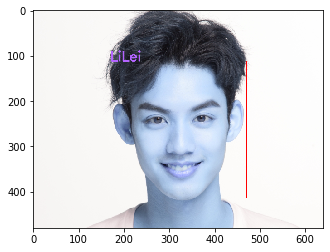

faceName : HanMeimei
imagePath: /home/wilson/faceEmotionCppLinux/res/register_images//HanMeimei.png
rect: 242 94 391 243


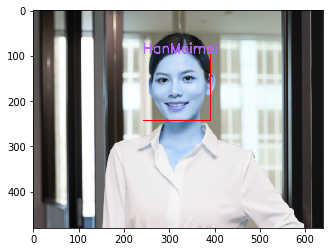

faceName : HuGe-6
imagePath: /home/wilson/faceEmotionCppLinux/res/register_images//HuGe-6.jpg
rect: 354 49 518 213


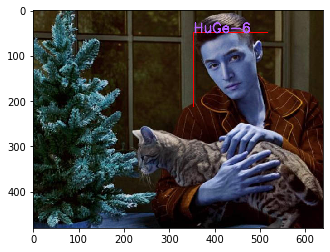

faceName : HuGe-7
imagePath: /home/wilson/faceEmotionCppLinux/res/register_images//HuGe-7.jpg
rect: 176 92 332 248


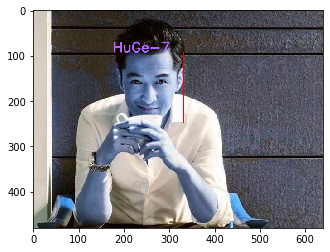

faceName : HuGe-2
imagePath: /home/wilson/faceEmotionCppLinux/res/register_images//HuGe-2.jpg
rect: 329 61 486 217


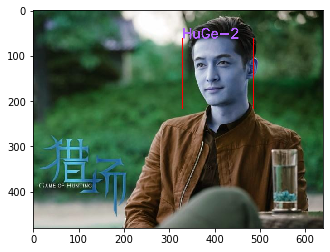

faceName : HuGe-9
imagePath: /home/wilson/faceEmotionCppLinux/res/register_images//HuGe-9.jpg
rect: 174 54 342 222


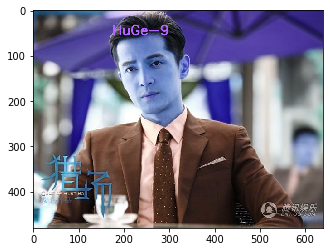

faceName : HuGe-10
imagePath: /home/wilson/faceEmotionCppLinux/res/register_images//HuGe-10.jpg
rect: 66 49 375 359


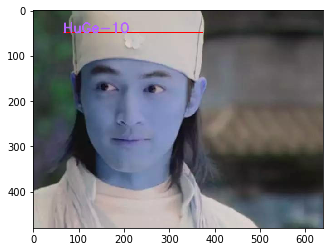

faceName : HuGe-8
imagePath: /home/wilson/faceEmotionCppLinux/res/register_images//HuGe-8.jpg
rect: 225 96 391 262


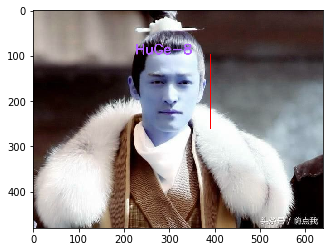

faceName : HuGe-5
imagePath: /home/wilson/faceEmotionCppLinux/res/register_images//HuGe-5.jpg
rect: 299 76 526 302


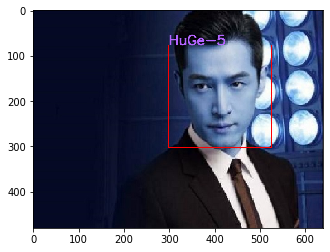

faceName : HuGe-4
imagePath: /home/wilson/faceEmotionCppLinux/res/register_images//HuGe-4.jpg
rect: 206 39 520 353


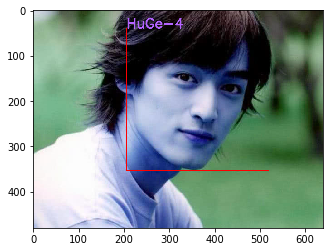

In [5]:
# 注册多张图片
# registerImage( '/home/wilson/faceEmotionCppLinux/res/register_images/')

faceName       : image-1
imagePath      : /home/wilson/faceEmotionCppLinux/res/recognize_images/image-1.png
rect           : 170 112 471 413
personName     : LiLei
confidenceLevel: 1.0


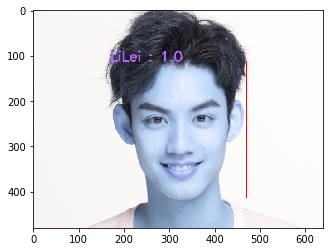

In [6]:
# 识别单张图片
# recognizeImage('/home/wilson/faceEmotionCppLinux/res/recognize_images/image-1.png')

faceName       : image-2
imagePath      : /home/wilson/faceEmotionCppLinux/res/recognize_images//image-2.png
rect           : 242 94 391 243
personName     : HanMeimei
confidenceLevel: 1.0


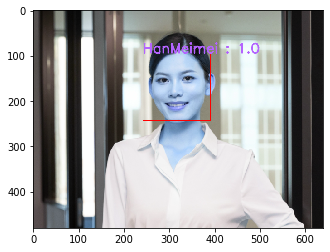

faceName       : image-3
imagePath      : /home/wilson/faceEmotionCppLinux/res/recognize_images//image-3.png
rect           : 150 95 429 374
personName     : HuGe-2
confidenceLevel: 0.9290636777877808


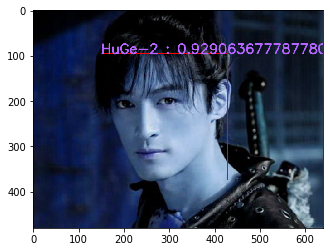

faceName       : image-1
imagePath      : /home/wilson/faceEmotionCppLinux/res/recognize_images//image-1.png
rect           : 170 112 471 413
personName     : LiLei
confidenceLevel: 1.0


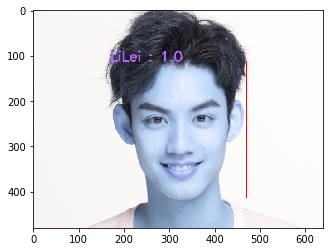

In [8]:
# 识别多张图片
recognizeImage('/home/wilson/faceEmotionCppLinux/res/recognize_images/')